In [ ]:
# 할당된 GPU 보기
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

# 현재 할당된 것이 CPU인지 GPU인지 확인
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

# 할당된 GPU를 실행
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
gpus = tf.config.experimental.list_physical_devices("GPU")
if gpus :
  try :
    # GPU 메모리 사용을 설|정
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as re :
    print(re)

# GPU 메모리를 전부 할당하지 않고 필요에 따라 자동으로 할당하도록 설정
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)

# 과적합 방지 방법

# Dropout
- 파라미터 수가 많기 때문(층, 퍼셉트론 수 많기 때문)
파라미터 : sum(입력 * 출력 + 출력)
- 위치 : 앞층과 뒷층 간에 파라미터 수가 크게 차이나는 곳에 주로 배치
- 현재 모델 유지를 위해 0.5 이상 입력하지 말 것!

<img src="https://drive.google.com/uc?id=1qsj8WJ-MTatGRtaQKBOXJ-5rZGLXpQTg">

# BatchNormalization
- CNN(Convolution)과 한 쌍으로 사용 : Conv2D + BN
- CNN : 더 많은 파라미터 

  --> 분산 클 수 있음

  --> 정규화 (0 ~ 1)  : 튀는 값이 사라짐

- 위치 : Conv2D와 Activation 층 사이에 배치
  Conv2D + BN + A

  <img src="https://drive.google.com/uc?id=1RwqS9tnov3lOz_RAwgIlDdfh9ztbtIuH">

# CNN - Convolution
- 같은 위치끼리 곱하고 결과들을 더해서 하나의 픽셀값으로 저장
- 전처리(특성 추출)의 목적으로 사용

<img src="https://drive.google.com/uc?id=17YJxtWmSoLvqFOQb2V0KerB_WLOPQ121">

<img src="https://drive.google.com/uc?id=1c9yihMZrrGUJcG9gcY9UIv9JlA4ppWKT">

- 문제점 : 이미지가 (필터 - 1) 만큼 줄어듦 >> 이미지 축소

  --> Padding
    - Zero Padding : 가장자리에 0을 붙여서 필터링 후에도 이미지 크기가 유지되게 함

<img src="https://drive.google.com/uc?id=1RFeC7o4OVctG0acylG7zWUg2rAkB5AG2">

  --> Pooling : 특성 선택, 이미지 축소
  
    - MaxPooling

<img src="https://drive.google.com/uc?id=1GabJFj6odxAS5t5dSEIwGEh5od8kPDHH">

    - AveragePooling : 대푯값이 아니라 이미지의 특성을 뽑아버림, 이미지가 뭉개져 버림

    - 노풀링?


  --> Flatten()

    - CNN은 다차원
    - DNN은 1차원 : Full Connection Layer

    - 특성 추출 --> 분류기로 넘어갈 때, 사용

  

# 패션 데이터셋을 이용한 이미지 분류
- 패션 데이터셋
  - 10가지의 패션 이미지 데이터로 구성
  - 60000개의 데이터
  - 이미지 크기 : 28 x 28
  
- Xception 모델을 전이학습

### Inception
- 파라미터를 줄이는 방법으로서 사용
- 1 x 1 Conv를 넣음

In [56]:
# 데이터 로드
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [57]:
# 훈련 데이터 1000개, 테스트 데이터 300개만 사용
X_train = X_train[:1000, :]
y_train = y_train[:1000]
X_test = X_test[:300, :]
y_test = y_test[:300]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1000, 28, 28), (1000,), (300, 28, 28), (300,))

In [58]:
# y의 라벨 확인
import pandas as pd
 
print(pd.Series(y_train).unique())
print(pd.Series(y_test).unique())

[9 0 3 2 7 5 1 6 4 8]
[9 2 1 6 4 5 7 3 8 0]


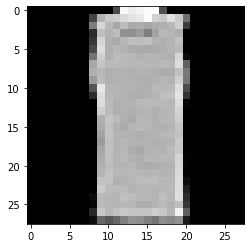

In [59]:
# 이미지 확인
import matplotlib.pyplot as plt

plt.imshow(X_train[160], cmap="gray")

In [60]:
# y를 원-핫 인코딩
y_train_en = pd.get_dummies(y_train)
y_test_en = pd.get_dummies(y_test)
y_train_en.shape, y_test_en.shape

((1000, 10), (300, 10))

In [61]:
# 이미지를 (244, 244) 크기로 변환
from PIL import Image
import numpy as np

train_resize_list = []

for i in range(len(X_train)) :
  train_resize_img = Image.fromarray(X_train[i]).resize((244 ,244))
  train_resize_list.append(np.array(train_resize_img))

test_resize_list = []
for i in range(len(X_test)) :
  test_resize_img = Image.fromarray(X_test[i]).resize((244, 244))
  test_resize_list.append(np.array(test_resize_img))

In [62]:
X_train_resized = np.array(train_resize_list)
X_test_resized = np.array(test_resize_list)

X_train_resized.shape, X_test_resized.shape

((1000, 244, 244), (300, 244, 244))

In [63]:
# 색상 채널 차원 추가
X_train_resized = X_train_resized.reshape(X_train_resized.shape[0], 244, 244, 1)
X_test_resized = X_test_resized.reshape(X_test_resized.shape[0], 244, 244, 1)

X_train_resized.shape, X_test_resized.shape

((1000, 244, 244, 1), (300, 244, 244, 1))

# 모델 설계 예시
- C + M + C + M 는 많이 안함 (왜냐하면 MaxPooling이 많이 느림)
- C + C + M + C + C + M
- C + C + C + M + C + C + C + M

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model1 = Sequential()

model1.add(Conv2D(
    filters = 32,  # 특징 갯수
    kernel_size = (3, 3),  # 특징의 크기
    input_shape = (244, 244, 1),  # 입력 데이터의 모양
    padding = 'same',  
    activation = 'relu'  # 활성화 함수
))

model1.add(Conv2D(
    filters = 64,  # 특징 갯수
    kernel_size = (3, 3),  # 특징의 크기
    input_shape = (244, 244, 1),  # 입력 데이터의 모양
    padding = 'same',  # 입력 이미지와 출력 이미지의 크길를 동일하게
    activation = 'relu'  # 활성화 함수
))

model1.add(Conv2D(
    filters = 128,  # 특징 갯수
    kernel_size = (3, 3),  # 특징의 크기
    input_shape = (244, 244, 1),  # 입력 데이터의 모양
    padding = 'same',  # 입력 이미지와 출력 이미지의 크길를 동일하게
    activation = 'relu'  # 활성화 함수
))

model1.add(MaxPool2D(
    pool_size = (2, 2)
))

model1.add(Conv2D(
    filters = 64,  # 특징 갯수
    kernel_size = (3, 3),  # 특징의 크기
    input_shape = (244, 244, 1),  # 입력 데이터의 모양
    padding = 'same',  # 입력 이미지와 출력 이미지의 크길를 동일하게
    activation = 'relu'  # 활성화 함수
))
model1.add(Conv2D(
    filters = 32,  # 특징 갯수
    kernel_size = (3, 3),  # 특징의 크기
    input_shape = (244, 244, 1),  # 입력 데이터의 모양
    padding = 'same',  # 입력 이미지와 출력 이미지의 크길를 동일하게
    activation = 'relu'  # 활성화 함수
))

model1.add(Conv2D(
    filters = 16,  # 특징 갯수
    kernel_size = (3, 3),  # 특징의 크기
    input_shape = (244, 244, 1),  # 입력 데이터의 모양
    padding = 'same',  # 입력 이미지와 출력 이미지의 크길를 동일하게
    activation = 'relu'  # 활성화 함수
))

model1.add(MaxPool2D(
    pool_size = (2, 2)
))

model1.add(Flatten())

model1.add(Dense(units=256, activation = 'relu'))

model1.add(Dense(units=10, activation='softmax'))

In [ ]:
model1.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
h1 = model1.fit(X_train_resized, y_train_en, epochs = 100, batch_size=100, validation_split=0.3)

Epoch 1/100
7/7 [==============================] - 10s 1s/step - loss: 14.7518 - accuracy: 0.3986 - val_loss: 1.0677 - val_accuracy: 0.6200
Epoch 2/100
7/7 [==============================] - 10s 1s/step - loss: 0.7768 - accuracy: 0.7486 - val_loss: 0.6591 - val_accuracy: 0.8000
Epoch 3/100
7/7 [==============================] - 10s 1s/step - loss: 0.3811 - accuracy: 0.8643 - val_loss: 0.6376 - val_accuracy: 0.8100
Epoch 4/100
7/7 [==============================] - 10s 1s/step - loss: 0.2123 - accuracy: 0.9286 - val_loss: 0.5411 - val_accuracy: 0.8267
Epoch 5/100
7/7 [==============================] - 10s 1s/step - loss: 0.0835 - accuracy: 0.9743 - val_loss: 0.7259 - val_accuracy: 0.8333
Epoch 6/100
7/7 [==============================] - 10s 1s/step - loss: 0.0303 - accuracy: 0.9929 - val_loss: 0.9973 - val_accuracy: 0.8267
Epoch 7/100
7/7 [==============================] - 10s 1s/step - loss: 0.0419 - accuracy: 0.9871 - val_loss: 1.1707 - val_accuracy: 0.7900
Epoch 8/100
7/7 [=========

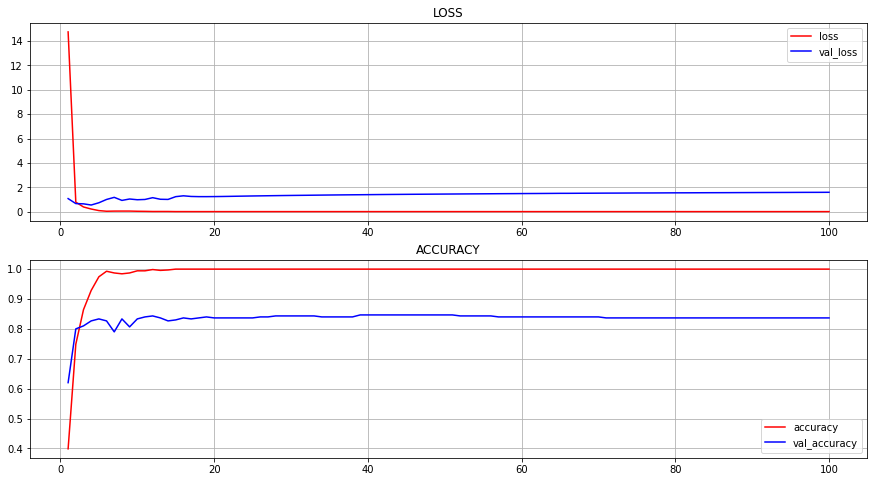

In [ ]:
import matplotlib.pyplot as plt

loss = h1.history["loss"]
acc = h1.history["accuracy"]
val_loss = h1.history["val_loss"]
val_acc = h1.history["val_accuracy"]

xaxis = range(1, 101)

plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.plot(xaxis, loss, 'r', label="Train")
plt.plot(xaxis, val_loss, 'b', label="Test")
plt.legend()
plt.grid()
plt.title("LOSS")

plt.subplot(2, 1, 2)
plt.plot(xaxis, acc, 'r', label="Train")
plt.plot(xaxis, val_acc, 'b', label="Test")
plt.legend()
plt.grid()
plt.title("ACCURACY")
plt.show()

### 선생님이랑 다시 층 쌓아보기

In [64]:
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization, Dropout, Activation

model2 = Sequential()

# CNN 층 설계 - 특성 추출기
# CNN 층의 최종 크기는 10 x 10 보다 크거나 작거나
model2.add(Conv2D(
    filters=32,
    kernel_size=(3, 3),
    input_shape=(244, 244, 1),
    activation="relu"
))
model2.add(Conv2D(
    filters=32,
    kernel_size=(3, 3),
    activation="relu"
))
model2.add(MaxPooling2D(
    pool_size=(2, 2)
))
model2.add(Conv2D(
    filters=64,
    kernel_size=(3, 3),
    activation="relu"
))
model2.add(Conv2D(
    filters=64,
    kernel_size=(3, 3),
    activation="relu"
))
model2.add(MaxPooling2D(
    pool_size=(2, 2)
))

# 다차원 데이터를 1차원으로 반환
model2.add(Flatten())

# 분류기 모델 설계
model2.add(Dense(units=256, activation="relu"))
model2.add(Dense(units=64, activation="relu"))
model2.add(Dense(units=10, activation="softmax"))

model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 242, 242, 32)      320       
                                                                 
 conv2d_33 (Conv2D)          (None, 240, 240, 32)      9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 120, 120, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 118, 118, 64)      18496     
                                                                 
 conv2d_35 (Conv2D)          (None, 116, 116, 64)      36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 58, 58, 64)       0         
 g2D)                                                 

In [65]:
model2.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [66]:
h2 = model2.fit(X_train_resized, y_train_en, epochs = 20, batch_size=10, validation_data=(X_test_resized, y_test_en))

Epoch 1/20
100/100 [==============================] - 6s 56ms/step - loss: 8.4992 - accuracy: 0.6480 - val_loss: 0.8079 - val_accuracy: 0.7567
Epoch 2/20
100/100 [==============================] - 5s 52ms/step - loss: 0.4674 - accuracy: 0.8430 - val_loss: 0.7694 - val_accuracy: 0.7533
Epoch 3/20
100/100 [==============================] - 5s 55ms/step - loss: 0.2313 - accuracy: 0.9240 - val_loss: 0.8027 - val_accuracy: 0.7733
Epoch 4/20
100/100 [==============================] - 6s 56ms/step - loss: 0.1477 - accuracy: 0.9550 - val_loss: 0.7933 - val_accuracy: 0.8167
Epoch 5/20
100/100 [==============================] - 5s 54ms/step - loss: 0.0789 - accuracy: 0.9790 - val_loss: 1.0523 - val_accuracy: 0.8133
Epoch 6/20
100/100 [==============================] - 5s 53ms/step - loss: 0.0363 - accuracy: 0.9880 - val_loss: 1.0109 - val_accuracy: 0.8033
Epoch 7/20
100/100 [==============================] - 5s 55ms/step - loss: 0.0964 - accuracy: 0.9770 - val_loss: 1.0731 - val_accuracy: 0.7833

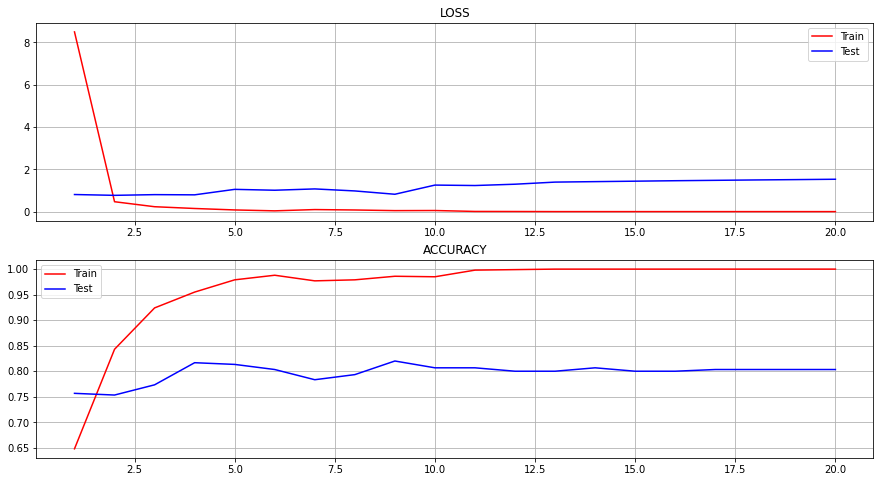

In [67]:
import matplotlib.pyplot as plt

loss2 = h2.history["loss"]
acc2 = h2.history["accuracy"]
val_loss2 = h2.history["val_loss"]
val_acc2 = h2.history["val_accuracy"]

xaxis = range(1, 21)

plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.plot(xaxis, loss2, 'r', label="Train")
plt.plot(xaxis, val_loss2, 'b', label="Test")
plt.legend()
plt.grid()
plt.title("LOSS")

plt.subplot(2, 1, 2)
plt.plot(xaxis, acc2, 'r', label="Train")
plt.plot(xaxis, val_acc2, 'b', label="Test")
plt.legend()
plt.grid()
plt.title("ACCURACY")
plt.show()

#  Dropout을 이용한 과적합 방지
- Dropout : 각 층의 퍼셉트론 수를 줄여서 과적합을 방지
- 0.5 이하의 값을 사용
- 위치 : 이전층과 다음층의 파라미터의 수가 많이 차이나는 곳에 배치( = 퍼셉트론 수가 많이 차이나는 곳)


In [68]:
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, Activation

model3 = Sequential()

# CNN 층 설계 - 특성 추출기
# CNN 층의 최종 크기는 10 x 10 보다 크거나 작거나
model3.add(Conv2D(filters=32, kernel_size=(3, 3),
                  input_shape=(244, 244, 1)))
model3.add(BatchNormalization())
model3.add(Activation("relu"))
model3.add(Conv2D(filters=32, kernel_size=(3, 3)))
model3.add(BatchNormalization())
model3.add(Activation("relu"))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(filters=64, kernel_size=(3, 3)))
model3.add(Activation("relu"))
model3.add(Conv2D(filters=128, kernel_size=(3, 3)))
model3.add(Activation("relu"))
model3.add(MaxPooling2D(pool_size=(2, 2)))
#model3.add(Dropout(0.5))

# 다차원 데이터를 1차원으로 변환
model3.add(Flatten())

# 분류기 모델 설계
model3.add(Dense(units=256, activation="relu"))
model3.add(Dropout(0.5))
model3.add(Dense(units=64, activation="relu"))
model3.add(Dropout(0.2))
model3.add(Dense(units=10, activation="softmax"))

model3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 242, 242, 32)      320       
                                                                 
 batch_normalization_10 (Bat  (None, 242, 242, 32)     128       
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 242, 242, 32)      0         
                                                                 
 conv2d_37 (Conv2D)          (None, 240, 240, 32)      9248      
                                                                 
 batch_normalization_11 (Bat  (None, 240, 240, 32)     128       
 chNormalization)                                                
                                                                 
 activation_11 (Activation)  (None, 240, 240, 32)     

In [69]:
model3.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [70]:
h3 = model3.fit(X_train_resized, y_train_en, epochs = 20, batch_size=10, validation_data=(X_test_resized, y_test_en))

Epoch 1/20
100/100 [==============================] - 9s 81ms/step - loss: 3.3814 - accuracy: 0.4960 - val_loss: 1.5602 - val_accuracy: 0.7400
Epoch 2/20
100/100 [==============================] - 8s 80ms/step - loss: 0.9034 - accuracy: 0.7060 - val_loss: 0.8488 - val_accuracy: 0.7667
Epoch 3/20
100/100 [==============================] - 8s 81ms/step - loss: 0.6669 - accuracy: 0.7920 - val_loss: 0.6509 - val_accuracy: 0.7633
Epoch 4/20
100/100 [==============================] - 8s 81ms/step - loss: 0.5676 - accuracy: 0.8060 - val_loss: 0.6620 - val_accuracy: 0.7700
Epoch 5/20
100/100 [==============================] - 8s 79ms/step - loss: 0.4430 - accuracy: 0.8520 - val_loss: 0.7922 - val_accuracy: 0.7900
Epoch 6/20
100/100 [==============================] - 8s 80ms/step - loss: 0.3963 - accuracy: 0.8630 - val_loss: 0.7140 - val_accuracy: 0.7667
Epoch 7/20
100/100 [==============================] - 8s 80ms/step - loss: 0.4156 - accuracy: 0.8670 - val_loss: 0.7591 - val_accuracy: 0.7700

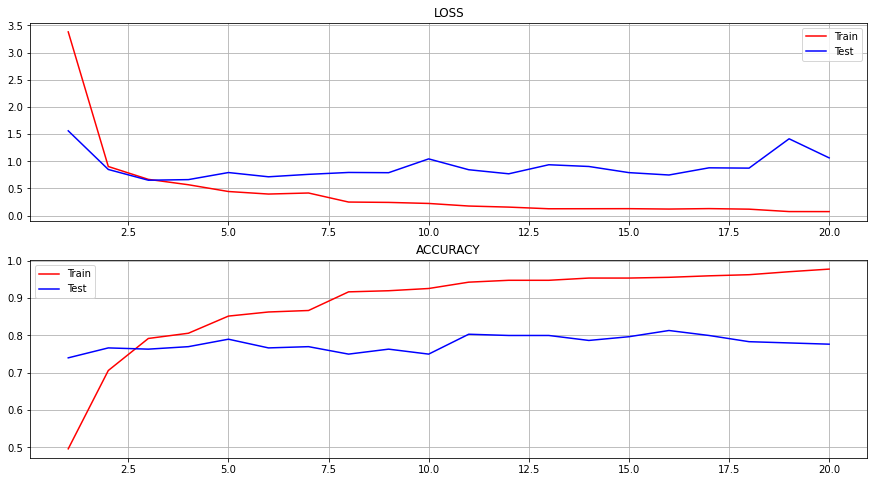

In [71]:
import matplotlib.pyplot as plt

loss3 = h3.history["loss"]
acc3 = h3.history["accuracy"]
val_loss3 = h3.history["val_loss"]
val_acc3 = h3.history["val_accuracy"]

xaxis = range(1, 21)

plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.plot(xaxis, loss3, 'r', label="Train")
plt.plot(xaxis, val_loss3, 'b', label="Test")
plt.legend()
plt.grid()
plt.title("LOSS")

plt.subplot(2, 1, 2)
plt.plot(xaxis, acc3, 'r', label="Train")
plt.plot(xaxis, val_acc3, 'b', label="Test")
plt.legend()
plt.grid()
plt.title("ACCURACY")
plt.show()

# BatchNormalization을 이용한 과적합 방지
- CNN 층에서 w, b의 값들을 정규화 (일정한 범위의 값으로 변환)
- 결과값의 변동폭을 줄여주는 효과

- Conv 층과 Activation 층 사이에 배치
  - Activation 층에 다음에 오면 Activation 층이 약간 정규화하는 효과가 있기 때문에 효과가 떨어짐

In [72]:
# w, b를 초기값을 동일하게 하기 위해서 seed 설정 필요
# 팀별로 할 때 같은 결과값을 보고 싶으면 아래 코드가 꼭 필요. 다만, 결과가 잘나오는 seed를 찾기 어려움
import tensorflow as tf
import numpy as np

seed = 0

np.random.seed(seed)
tf.random.set_seed(seed)

In [73]:
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dropout, Activation

model4 = Sequential()

# CNN 층 설계 - 특성 추출기
model4.add(Conv2D(
    filters=32,
    kernel_size=(3, 3),
    input_shape=(244, 244, 1),
   
))
model3.add(BatchNormalization())
model4.add(Activation("relu"))
model4.add(Conv2D(
    filters=32,
    kernel_size=(3, 3),
))
model3.add(BatchNormalization())
model4.add(Activation("relu"))
model4.add(MaxPooling2D(
    pool_size=(2, 2)
))
model4.add(Conv2D(
    filters=64,
    kernel_size=(3, 3),
    activation="relu"
))
model3.add(BatchNormalization())
model4.add(Activation("relu"))
model4.add(Conv2D(
    filters=64,
    kernel_size=(3, 3),
    activation="relu"
))
model3.add(BatchNormalization())
model4.add(Activation("relu"))

model4.add(MaxPooling2D(
    pool_size=(2, 2)
))

# 다차원 데이터를 1차원으로 변환
#model4.add(Dropout(0.5))

# 다차원 데이터를 1차원으로 반환
model4.add(Flatten())

# 분류기 모델 설계
model4.add(Dense(units=256, activation="relu"))
model4.add(Dropout(0.5))
model4.add(Dense(units=64, activation="relu"))
model4.add(Dropout(0.2))
model4.add(Dense(units=10, activation="softmax"))

model4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 242, 242, 32)      320       
                                                                 
 activation_14 (Activation)  (None, 242, 242, 32)      0         
                                                                 
 conv2d_41 (Conv2D)          (None, 240, 240, 32)      9248      
                                                                 
 activation_15 (Activation)  (None, 240, 240, 32)      0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 120, 120, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 118, 118, 64)      18496     
                                                     

In [74]:
model4.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [75]:
h4 = model4.fit(X_train_resized, y_train_en, epochs = 100, batch_size=100, validation_data=(X_test_resized, y_test_en))

Epoch 1/100
10/10 [==============================] - 6s 463ms/step - loss: 37.4867 - accuracy: 0.2360 - val_loss: 1.3826 - val_accuracy: 0.6167
Epoch 2/100
10/10 [==============================] - 5s 473ms/step - loss: 1.1514 - accuracy: 0.6040 - val_loss: 0.6812 - val_accuracy: 0.7833
Epoch 3/100
10/10 [==============================] - 4s 449ms/step - loss: 0.8161 - accuracy: 0.7390 - val_loss: 0.5518 - val_accuracy: 0.8467
Epoch 4/100
10/10 [==============================] - 5s 479ms/step - loss: 0.5683 - accuracy: 0.8130 - val_loss: 0.5425 - val_accuracy: 0.8333
Epoch 5/100
10/10 [==============================] - 5s 459ms/step - loss: 0.4700 - accuracy: 0.8370 - val_loss: 0.4806 - val_accuracy: 0.8367
Epoch 6/100
10/10 [==============================] - 5s 456ms/step - loss: 0.4442 - accuracy: 0.8530 - val_loss: 0.5417 - val_accuracy: 0.8533
Epoch 7/100
10/10 [==============================] - 5s 459ms/step - loss: 0.3759 - accuracy: 0.8850 - val_loss: 0.5618 - val_accuracy: 0.830

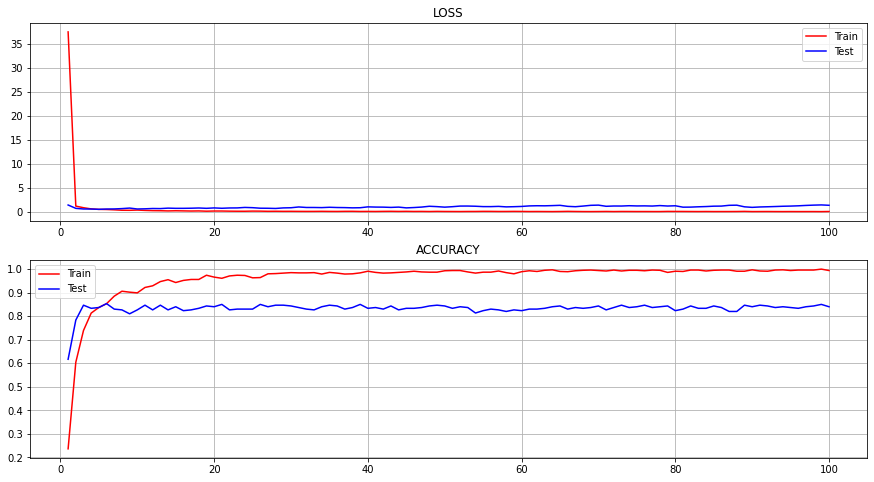

In [76]:
import matplotlib.pyplot as plt

loss4 = h4.history["loss"]
acc4 = h4.history["accuracy"]
val_loss4 = h4.history["val_loss"]
val_acc4 = h4.history["val_accuracy"]

xaxis = range(1, 101)

plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.plot(xaxis, loss4, 'r', label="Train")
plt.plot(xaxis, val_loss4, 'b', label="Test")
plt.legend()
plt.grid()
plt.title("LOSS")

plt.subplot(2, 1, 2)
plt.plot(xaxis, acc4, 'r', label="Train")
plt.plot(xaxis, val_acc4, 'b', label="Test")
plt.legend()
plt.grid()
plt.title("ACCURACY")
plt.show()

# GlobalAveragePooling2D
- 다원원 배열을 1차원 만들 때, AveragePooling 방법을 사용
- 근처 특성값들을 평균내서 크기를 줄이는 방식으로 1차원으로 변환  >> Flatten() 층 대신에 사용

<img src="https://drive.google.com/uc?id=1QT1PyPmlzIMOgcHhntIc4Is3nyI0Bfmu">

In [78]:
# w, b를 초기값을 동일하게 하기 위해서 seed 설정 필요
# 팀별로 할 때 같은 결과값을 보고 싶으면 아래 코드가 꼭 필요. 다만, 결과가 잘나오는 seed를 찾기 어려움
import tensorflow as tf
import numpy as np

seed = 0

np.random.seed(seed)
tf.random.set_seed(seed)

In [79]:
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, Activation

model5 = Sequential()

model5.add(Conv2D(filters=32, kernel_size=(3, 3), 
                  input_shape=(244, 244, 1)))
model5.add(BatchNormalization())
model5.add(Activation("relu"))
model5.add(Conv2D(filters=32, kernel_size=(3, 3)))
model5.add(BatchNormalization())
model5.add(Activation("relu"))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(filters=64, kernel_size=(3, 3)))
model5.add(Activation("relu"))
model5.add(Conv2D(filters=128, kernel_size=(3, 3)))
model5.add(Activation("relu"))
model5.add(MaxPooling2D(pool_size=(2, 2)))
#model3.add(Dropout(0.5))

# 다차원 데이터를 1차원을 변환
model5.add(GlobalAveragePooling2D())

# 분류기 모델 설계
model5.add(Dense(units=256, activation="relu"))
model5.add(Dropout(0.5))
model5.add(Dense(units=64, activation="relu"))
model5.add(Dropout(0.2))
model5.add(Dense(units=10, activation="softmax"))

model5.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 242, 242, 32)      320       
                                                                 
 batch_normalization_18 (Bat  (None, 242, 242, 32)     128       
 chNormalization)                                                
                                                                 
 activation_22 (Activation)  (None, 242, 242, 32)      0         
                                                                 
 conv2d_49 (Conv2D)          (None, 240, 240, 32)      9248      
                                                                 
 batch_normalization_19 (Bat  (None, 240, 240, 32)     128       
 chNormalization)                                                
                                                                 
 activation_23 (Activation)  (None, 240, 240, 32)    

In [80]:
model5.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [81]:
h5 = model5.fit(X_train_resized, y_train_en, batch_size=20, epochs=10,
                validation_data=(X_test_resized, y_test_en))

Epoch 1/10
50/50 [==============================] - 9s 127ms/step - loss: 2.2463 - accuracy: 0.1510 - val_loss: 2.0337 - val_accuracy: 0.2100
Epoch 2/10
50/50 [==============================] - 6s 111ms/step - loss: 2.0412 - accuracy: 0.2140 - val_loss: 2.4964 - val_accuracy: 0.1333
Epoch 3/10
50/50 [==============================] - 5s 107ms/step - loss: 1.8974 - accuracy: 0.2440 - val_loss: 3.6440 - val_accuracy: 0.1067
Epoch 4/10
50/50 [==============================] - 5s 108ms/step - loss: 1.7584 - accuracy: 0.3070 - val_loss: 1.8391 - val_accuracy: 0.2800
Epoch 5/10
50/50 [==============================] - 6s 112ms/step - loss: 1.6383 - accuracy: 0.3600 - val_loss: 1.5148 - val_accuracy: 0.3767
Epoch 6/10
50/50 [==============================] - 5s 109ms/step - loss: 1.5751 - accuracy: 0.3700 - val_loss: 1.3874 - val_accuracy: 0.4700
Epoch 7/10
50/50 [==============================] - 5s 107ms/step - loss: 1.5235 - accuracy: 0.3860 - val_loss: 1.9129 - val_accuracy: 0.3033
Epoch 

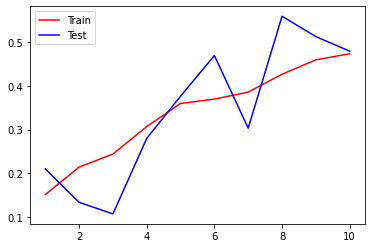

In [82]:
import matplotlib.pyplot as plt

acc5 = h5.history["accuracy"]
val_acc5 = h5.history["val_accuracy"]

e = range(1, len(acc5) + 1)

plt.plot(e, acc5, "r", label="Train")
plt.plot(e, val_acc5, "b", label="Test")
plt.legend()

# Exception 모델을 이용한 전이학습


In [83]:
# Exception 모델 가져오기
from tensorflow.keras.applications import Xception

# include_top : 모델을 가져올 때, 분류기를 가져올 지 여부(False이면 CNN층만 가져옴)
# weights : 가져 올 가중치의 종류(imagenet)
# input_shape() : 사용할 입력 이미지 크기

pre_trained_model = Xception(include_top = False, 
                             weights = 'imagenet',
                             input_shape=(244, 244, 3))
pre_trained_model.summary()


Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 244, 244, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 121, 121, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 121, 121, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [84]:
X_train_resized.shape, X_test_resized.shape

((1000, 244, 244, 1), (300, 244, 244, 1))

In [85]:
# 1채널인 색상채널을 3채널로 변환
# 3차원 축을 3번 반복해서 저장
X_train_resized = np.repeat(X_train_resized, 3, axis=3)
X_test_resized = np.repeat(X_test_resized, 3, axis=3)
X_train_resized.shape, X_test_resized.shape

((1000, 244, 244, 3), (300, 244, 244, 3))

In [86]:
# 전이학습 모델 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

model6 = Sequential()

# Xception 모델을 전이학습
model6.add(pre_trained_model)

model6.add(Flatten())

# 우리가 설계한 분류 모델을 추가
model6.add(Dense(units=256, activation="relu"))
model6.add(Dropout(0.5))
model6.add(Dense(units=64, activation="relu"))
model6.add(Dropout(0.2))
model6.add(Dense(units=10, activation="softmax"))

model6.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 flatten_11 (Flatten)        (None, 131072)            0         
                                                                 
 dense_39 (Dense)            (None, 256)               33554688  
                                                                 
 dropout_27 (Dropout)        (None, 256)               0         
                                                                 
 dense_40 (Dense)            (None, 64)                16448     
                                                                 
 dropout_28 (Dropout)        (None, 64)                0         
                                                                 
 dense_41 (Dense)            (None, 10)              

In [87]:
model6.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [88]:
h6 = model6.fit(X_train_resized, y_train_en, epochs = 100, batch_size=50, validation_data=(X_test_resized, y_test_en))

Epoch 1/100
20/20 [==============================] - 92s 1s/step - loss: 2.7300 - accuracy: 0.1060 - val_loss: 2.3048 - val_accuracy: 0.1100
Epoch 2/100
20/20 [==============================] - 26s 1s/step - loss: 2.2860 - accuracy: 0.1440 - val_loss: 2.3269 - val_accuracy: 0.0800
Epoch 3/100
20/20 [==============================] - 26s 1s/step - loss: 1.6895 - accuracy: 0.4020 - val_loss: 1.5145 - val_accuracy: 0.4233
Epoch 4/100
20/20 [==============================] - 26s 1s/step - loss: 0.9737 - accuracy: 0.6900 - val_loss: 1.8398 - val_accuracy: 0.6467
Epoch 5/100
20/20 [==============================] - 25s 1s/step - loss: 0.8405 - accuracy: 0.7430 - val_loss: 1.6166 - val_accuracy: 0.6833
Epoch 6/100
20/20 [==============================] - 26s 1s/step - loss: 0.5410 - accuracy: 0.8280 - val_loss: 1.0201 - val_accuracy: 0.7933
Epoch 7/100
20/20 [==============================] - 26s 1s/step - loss: 0.4285 - accuracy: 0.8730 - val_loss: 1.2035 - val_accuracy: 0.7000
Epoch 8/100
2

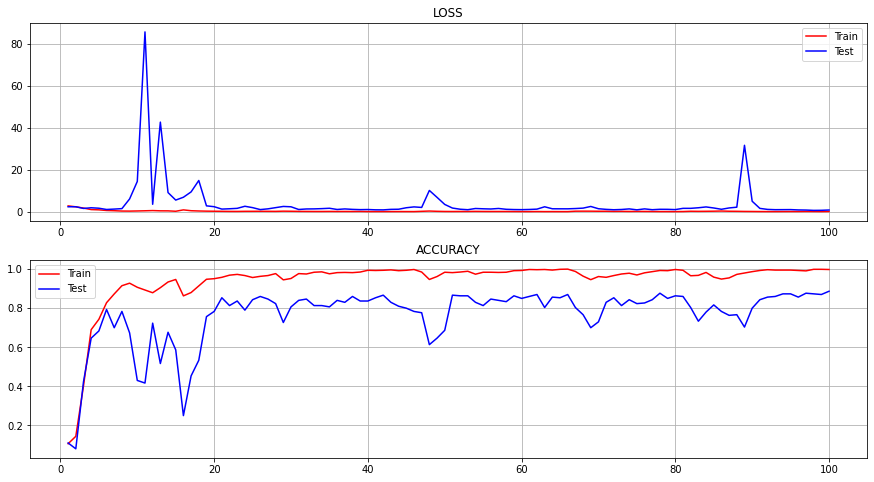

In [89]:
import matplotlib.pyplot as plt

loss6 = h6.history["loss"]
acc6 = h6.history["accuracy"]
val_loss6 = h6.history["val_loss"]
val_acc6 = h6.history["val_accuracy"]

xaxis = range(1, 101)

plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.plot(xaxis, loss6, 'r', label="Train")
plt.plot(xaxis, val_loss6, 'b', label="Test")
plt.legend()
plt.grid()
plt.title("LOSS")

plt.subplot(2, 1, 2)
plt.plot(xaxis, acc6, 'r', label="Train")
plt.plot(xaxis, val_acc6, 'b', label="Test")
plt.legend()
plt.grid()
plt.title("ACCURACY")
plt.show()